In [60]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

## Organize the data

In [61]:
# Read in the 2018 data 
df = pd.read_csv("../data/eda_structuring_with_python_dataset1.csv")
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [62]:
# Convert the 'date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.8+ MB


In [64]:
df.shape

(3401012, 3)

In [65]:
# Check for duplicate().shape
df.drop_duplicates().shape

(3401012, 3)

## Locations with most strikes in a single day 

In [66]:
# Sort by number of strikes in descending order. 
df.sort_values(by='number_of_strikes', ascending=False).head(10)

,date,number_of_strikes,center_point_geom
302758,2018-08-20,2211,POINT(-92.5 35.5)
278383,2018-08-16,2142,POINT(-96.1 36.1)
280830,2018-08-17,2061,POINT(-90.2 36.1)
280453,2018-08-17,2031,POINT(-89.9 35.9)
278382,2018-08-16,1902,POINT(-96.2 36.1)
11517,2018-02-10,1899,POINT(-95.5 28.1)
277506,2018-08-16,1878,POINT(-89.7 31.5)
24906,2018-02-25,1833,POINT(-98.7 28.9)
284320,2018-08-17,1767,POINT(-90.1 36)
24825,2018-02-25,1741,POINT(-98 29)


Each row represents a grid cell (defined by its center point) and a specific date.
The number_of_strikes column shows the total number of lightning strikes recorded within that grid cell during that single day.
This table highlights locations that experienced the highest daily lightning activity.”

## Locations with most days with at least one lightining strike

In [67]:
# Identify the locations that appear most in the dataset.
df.center_point_geom.value_counts()

center_point_geom
POINT(-81.5 22.5)    108
POINT(-84.1 22.4)    108
POINT(-82.7 22.9)    107
POINT(-82.5 22.9)    107
POINT(-84.2 22.3)    106
                    ... 
POINT(-53.9 45.8)      1
POINT(-56 45.9)        1
POINT(-53.9 42.6)      1
POINT(-60.2 44.2)      1
POINT(-53.8 45.6)      1
Name: count, Length: 170855, dtype: int64

This aggregation sums the total number of lightning strikes recorded at each grid cell across all days in 2018, providing the annual lightning activity per location regardless of date.

In [68]:
# Identify the top 20 locations with most daya of lightning.
df.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index(name="counts").style.background_gradient()

,unique_values,counts
0,POINT(-81.5 22.5),108
1,POINT(-84.1 22.4),108
2,POINT(-82.7 22.9),107
3,POINT(-82.5 22.9),107
4,POINT(-84.2 22.3),106
5,POINT(-82.5 22.8),106
6,POINT(-75.9 20.4),105
7,POINT(-76 20.5),105
8,POINT(-78 18.2),104
9,POINT(-82.2 22.9),104


This analysis identifies the top 20 locations (grid cells) that appear most frequently in the dataset, meaning the locations with the highest number of days or records with registered lightning activity. The results are displayed as a formatted table with a color gradient to highlight differences in frequency.

## Lightning strikes by day of week

In [69]:
# Create two new columns.
df['week'] = df.date.dt.isocalendar().week
df['weekday'] = df.date.dt.day_name()
df.head()

,date,number_of_strikes,center_point_geom,week,weekday
0,2018-01-03,194,POINT(-75 27),1,Wednesday
1,2018-01-03,41,POINT(-78.4 29),1,Wednesday
2,2018-01-03,33,POINT(-73.9 27),1,Wednesday
3,2018-01-03,38,POINT(-73.8 27),1,Wednesday
4,2018-01-03,92,POINT(-79 28),1,Wednesday


Each row represents a single grid cell on a specific date.
The number_of_strikes column indicates how many lightning strikes were recorded in that grid cell on that day.
Multiple rows for the same date correspond to different spatial locations

In [70]:
# Calculate the mean count of lightning strikes for each weekday.
df[['weekday','number_of_strikes']].groupby(['weekday']).mean()

,number_of_strikes
weekday,
Friday,13.349972
Monday,13.152804
Saturday,12.732694
Sunday,12.324717
Thursday,13.240594
Tuesday,13.813599
Wednesday,13.224568


It groups the data by day of the week and calculates the average number of lightning strikes per grid cell for each weekday across all dates in 2018.

In [72]:
# Define order of days for the plot.
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']


Text(0.5, 1.0, 'Lightning distribution per weekday (2018)')

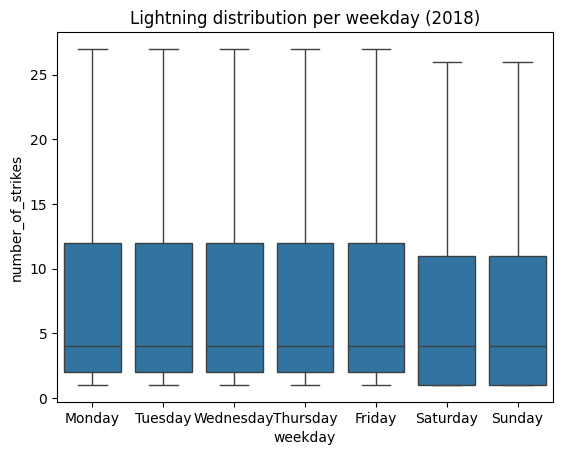

In [73]:
# Create boxplots of strike counts for each day of week.
g = sns.boxplot(data=df, 
            x='weekday',
            y='number_of_strikes', 
            order=weekday_order, 
            showfliers=False 
            );
g.set_title('Lightning distribution per weekday (2018)')

## Monthly lightning strikes 2016–2018

In [75]:
# Import 2016–2017 data
df_2 = pd.read_csv('../data/eda_structuring_with_python_dataset2.csv')
df_2.head()

,date,number_of_strikes,center_point_geom
0,2016-01-04,55,POINT(-83.2 21.1)
1,2016-01-04,33,POINT(-83.1 21.1)
2,2016-01-05,46,POINT(-77.5 22.1)
3,2016-01-05,28,POINT(-76.8 22.3)
4,2016-01-05,28,POINT(-77 22.1)


In [76]:
# Convert `date` column to datetime.
df_2['date'] = pd.to_datetime(df_2['date'])

In [77]:
# Create a new dataframe combining 2016–2017 data with 2018 data.
union_df = pd.concat([df.drop(['weekday','week'],axis=1), df_2], ignore_index=True)
union_df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [78]:
# Add 3 new columns.
union_df['year'] = union_df.date.dt.year
union_df['month'] = union_df.date.dt.month
union_df['month_txt'] = union_df.date.dt.month_name()
union_df.head()

,date,number_of_strikes,center_point_geom,year,month,month_txt
0,2018-01-03,194,POINT(-75 27),2018,1,January
1,2018-01-03,41,POINT(-78.4 29),2018,1,January
2,2018-01-03,33,POINT(-73.9 27),2018,1,January
3,2018-01-03,38,POINT(-73.8 27),2018,1,January
4,2018-01-03,92,POINT(-79 28),2018,1,January


In [79]:
# Calculate total number of strikes per year
union_df[['year','number_of_strikes']].groupby(['year']).sum()

,number_of_strikes
year,
2016,41582229
2017,35095195
2018,44600989


In [80]:
# Calculate total lightning strikes for each month of each year.
lightning_by_month = union_df.groupby(['month_txt','year']).agg(
    number_of_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
    ).reset_index()

lightning_by_month.head()

C:\Users\vpdio\AppData\Local\Temp\ipykernel_19696\4141918718.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  lightning_by_month = union_df.groupby(['month_txt','year']).agg(


,month_txt,year,number_of_strikes
0,April,2016,2636427
1,April,2017,3819075
2,April,2018,1524339
3,August,2016,7250442
4,August,2017,6021702


In [81]:
# Calculate total lightning strikes for each year.
lightning_by_year = union_df.groupby(['year']).agg(
  year_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
).reset_index()

lightning_by_year.head()

C:\Users\vpdio\AppData\Local\Temp\ipykernel_19696\1371192814.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  lightning_by_year = union_df.groupby(['year']).agg(


,year,year_strikes
0,2016,41582229
1,2017,35095195
2,2018,44600989


In [82]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe.
percentage_lightning = lightning_by_month.merge(lightning_by_year,on='year')
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes
0,April,2016,2636427,41582229
1,April,2017,3819075,35095195
2,April,2018,1524339,44600989
3,August,2016,7250442,41582229
4,August,2017,6021702,35095195


In [ ]:
# Create new `percentage_lightning_per_month` column.
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes/
                                                          percentage_lightning.year_strikes * 100.0)
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes,percentage_lightning_per_month
0,April,2016,2636427,41582229,6.340273
1,April,2017,3819075,35095195,10.882045
2,April,2018,1524339,44600989,3.417725
3,August,2016,7250442,41582229,17.436396
4,August,2017,6021702,35095195,17.158195


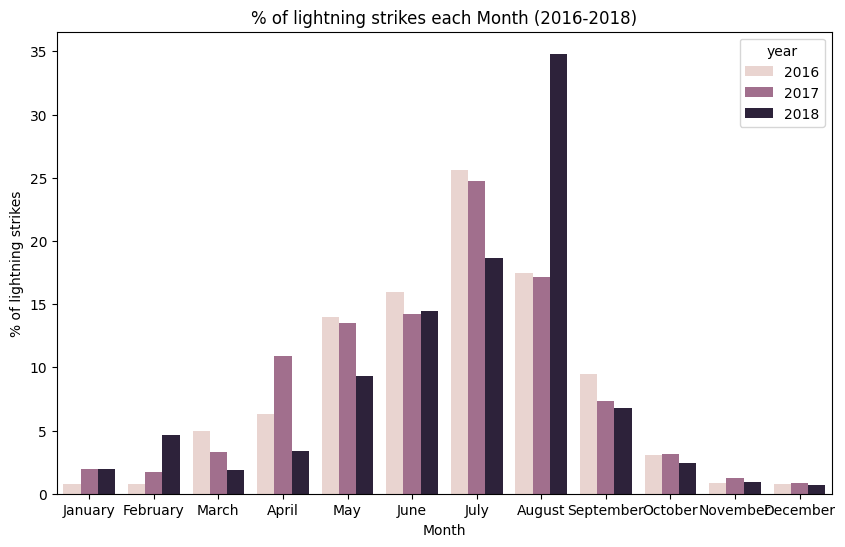

In [84]:
plt.figure(figsize=(10,6));

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(
    data = percentage_lightning,
    x = 'month_txt',
    y = 'percentage_lightning_per_month',
    hue = 'year',
    order = month_order );
plt.xlabel("Month");
plt.ylabel("% of lightning strikes");
plt.title("% of lightning strikes each Month (2016-2018)");